# A SURVEY OF STAR WARS FANS

This analysis looks at data from a survey given to Star Wars fans using the online tool SurveyMonkey. The data can be found here: https://github.com/fivethirtyeight/data/tree/master/star-wars-survey

In particular, survey takeers were interested in the question - " does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?". Our analysis answers the following additional questions:

    - What was the most watched movie among respondents? Least watched?
    - What was the favorite movie among respondents? Least favorite?
    - Are movie preferences related to gender or education?
    - Did respondents in certain geographic locations have different preferences?
    - Did star wars fans have different preferences than non-fans?
    
Below are the column definitions:
    
    RespondentID - An anonymized ID for the respondent (person taking the survey)
    Gender - The respondent's gender
    Age - The respondent's age
    Household Income - The respondent's income
    Education - The respondent's education level
    Location (Census Region) - The respondent's location
    Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
    Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response
    
    

In [323]:
import pandas as pd
#Reading in the data
star_wars = pd.read_csv('C:\\Users\\chamion\\PYTHON_WORKBOOK\\starwars\\star_wars.csv',encoding= 'ISO-8859-1')

In [324]:
#Looking at first 5 rows 
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [325]:
# A look at columns
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

#### Filter df for unique star_wars RespondentID (no null values)

In [326]:
# Removing RespondentIDs= NaN
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

#### Convert 'Have you seen any of the 6 films in the Star Wars franchise?' column to Boolean

In [327]:
yes_no = {'Yes': True, 'No': False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

#### Convert the 'Do you consider yourself to be a fan of the Star Wars film franchise?' column to boolean

In [328]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

#### Convert columns 3 to 8 to Boolean

In [329]:
import numpy as np
movie_mapping = {np.nan: False,
              'Star Wars: Episode I  The Phantom Menace': True,
              'Star Wars: Episode II  Attack of the Clones': True,
              'Star Wars: Episode III  Revenge of the Sith': True,
              'Star Wars: Episode IV  A New Hope': True,
              'Star Wars: Episode V The Empire Strikes Back': True,
              'Star Wars: Episode VI Return of the Jedi': True
              }

for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(movie_mapping)

In [330]:
star_wars[star_wars.columns[3:9]].head(3)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False


#### Rename columns 3 to 8 with more intuitive names

              Star Wars: Episode I The Phantom Menace:seen_1
              Star Wars: Episode II Attack of the Clones: seen_2
              Star Wars: Episode III Revenge of the Sith: seen_3
              Star Wars: Episode IV A New Hope: seen_4
              Star Wars: Episode V The Empire Strikes Back: seen_5
              Star Wars: Episode VI Return of the Jedi: seen_6

In [331]:
column_mapping = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                  'Unnamed: 4': 'seen_2',
                  'Unnamed: 5': 'seen_3',
                  'Unnamed: 6': 'seen_4',
                  'Unnamed: 7': 'seen_5',
                  'Unnamed: 8': 'seen_6'}

# Mapping new column names unto columns 4 through 9
star_wars = star_wars.rename(columns = column_mapping)

In [332]:
star_wars[star_wars.columns[9:15]].head(3)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6


#### Convert columns 9 to 14 to type float

In [333]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#### Rename columns 9 to 14 with more intuitive names

In [334]:
rank_mapping = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
               'Unnamed: 10':'ranking_2',
                'Unnamed: 11':'ranking_3',
                'Unnamed: 12':'ranking_4',
                'Unnamed: 13':'ranking_5',
                'Unnamed: 14':'ranking_6'
                }

star_wars = star_wars.rename(columns = rank_mapping)

In [335]:
seen_cols = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
ranking_cols = ['ranking_1', 'ranking_2','ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']    

# Rankings / movie attendance for all demographics

#### How did movie attenders rank each movie?

In [337]:
star_wars[ranking_cols].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

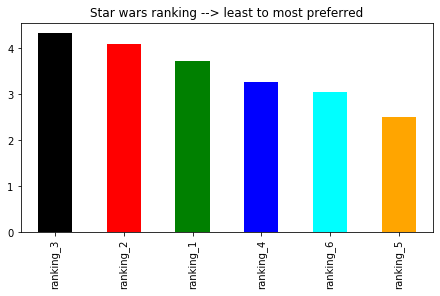

In [338]:
%matplotlib inline
star_wars[ranking_cols].mean().sort_values(ascending = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan', 'orange'], title ='Star wars ranking --> least to most preferred')

#### How many people saw each movie?

In [339]:
star_wars[seen_cols].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

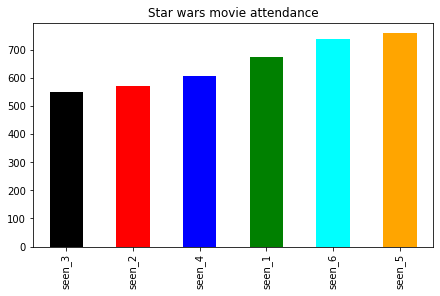

In [340]:
%matplotlib inline
star_wars[seen_cols].sum().sort_values().plot.bar(color=['black', 'red', 'blue', 'green', 'cyan', 'orange'], title = 'Star wars movie attendance')

**To answer survey takers' first question - "does the rest of America realize that “The Empire Strikes Back” - the data conclusively shows, YES, this is the case. "Episode V The Empire Strikes Back" was the highest ranked and most attended movie among star wars collection.**

The data additionally shows:

- "Episode VI Return of the Jedi" was the second most watched.
- Fewest people watched and liked "Episode III Revenge of the Sith"
- There was a steady decline of ratings and movie attendance for the first 3 movies.
- "Episode IV A New Hope" rekindled an interest in movie goers, resulting in  higher movie attendance for sequels. It had higher ratings than movie 3.

# How did males / females rank the movies?

In [341]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

#### Highest ranked movie among males? females?

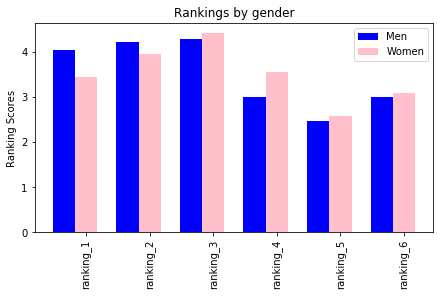

In [342]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)


## necessary variables
ind = np.arange(6)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, males[ranking_cols].mean(), width,
                color='blue')

rects2 = ax.bar(ind+width, females[ranking_cols].mean(), width,
                    color='pink')

ax.set_ylabel('Ranking Scores')
ax.set_title('Rankings by gender')
xTickMarks = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )
                    

Recall that 1 is highest rating, and 6 is lowest

- Women rated the first 2 movies -'Episode I The Phantom Menace' and 'Episode II Attack of the Clones' higher than men.
- Men ranked the last 4 movies higher than women.
- Men and women most greatly disagree about ranking of "Episode I The Phantom Menace" (movie 1) and "Episode IV A New Hope" (movie 4)
- Though men rank higher the last 2 movies (Episode V The Empire Strikes Back & 'Episode VI Return of the Jedi'), men and women generally agree on their overall higher rankings.

#### Most visited movies between men and women?

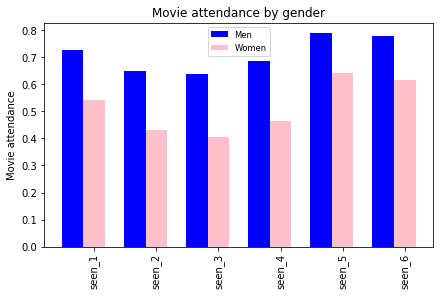

In [343]:
fig = plt.figure()
ax = fig.add_subplot(111)


## necessary variables
ind = np.arange(6)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, males[seen_cols].mean(), width,
                color='blue')

rects2 = ax.bar(ind+width, females[seen_cols].mean(), width,
                    color='pink')

ax.set_ylabel('Movie attendance')
ax.set_title('Movie attendance by gender')
xTickMarks = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=90, fontsize=10)

## add a legend
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small') #Making the legend smaller to avoid blocking plot
ax.legend( (rects1[0], rects2[0]), ('Men', 'Women'),prop=fontP )
                    

More men than women attended star wars movies across the board.

#### By how much did male and female movie attendance vary?

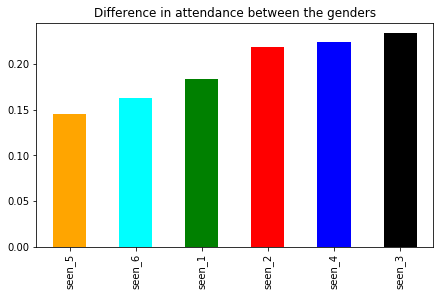

In [344]:
#Movie attendance differences between men and women
(males[seen_cols].mean() - females[seen_cols].mean()).sort_values().plot.bar(color = ['orange', 'cyan', 'green', 'red', 'blue', 'black'], title = 'Difference in attendance between the genders')

Across the board more men watch Star Wars movies than women. Men and women have the most similar attendance to movie5 ('Episode V The Empire Strikes Back') and many more men than women attended the viewing of movie3(Episode III  Revenge of the Sith).

# Did respondent's education level play a role in his movie choice?

### Number of seen movies across education levels

In [345]:
# Creating a dictionary of dfs for seen movies across all education levels
education_vs_seen_dict = {}
education_levels = ['Some college or Associate degree', 'Bachelor degree', 'Graduate degree', 'High school degree', 'Less than high school degree']

for level in education_levels:
    df = star_wars[seen_cols][star_wars['Education'] == level].sum().to_frame()
    key_name = level
    education_vs_seen_dict[key_name] = df

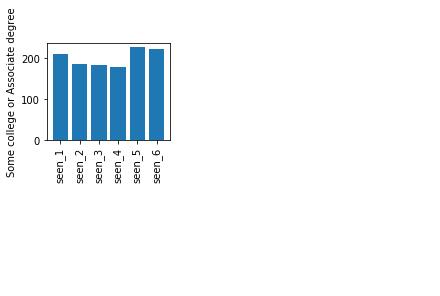

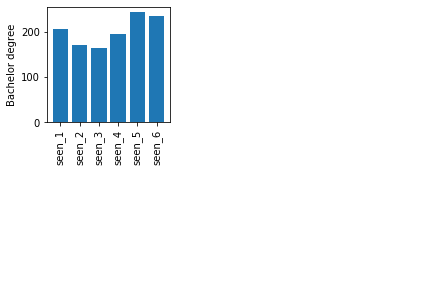

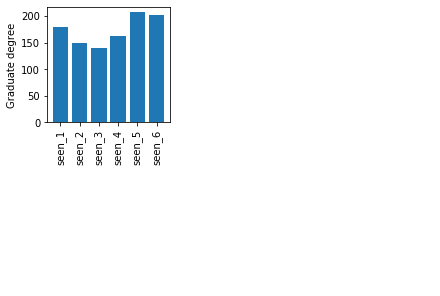

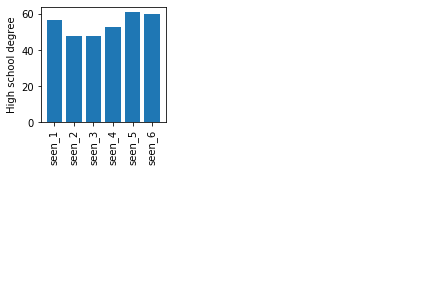

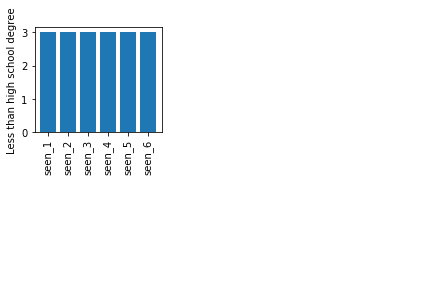

In [346]:
# Plotting Movie attendance across education levels
x = range(6)

for level in education_levels:
    plot_number = 1
    plt.subplot(2,3,plot_number)
    plt.bar(x,education_vs_seen_dict[level][0])
    plt.ylabel(level)
    plt.xticks(x,seen_cols, rotation='vertical')
    plt.show()
    plot_number += 1    

#### Movie attendance across education levels


Among all education leves (except 'Less than high school' category) we see a similar pattern of movie attendance:

- Most people watched movies 5 and 6 (with 5 having slightly higher attendance)
- Fewer numbers of people saw movies 2,3 and 4.
- There was higher attendance for movie 1 than the following 3 sequels.

For those in 'Less than high school' category, respondents attended all movies equally. This, however, was a very small data set since only 3 respondents were from this category.

<font color='blue'>Aside from the 'Less than High School'education category, respondents' education does not seem to play a role in their star wars movie attendance.


### Movie rankings across all education levels

In [347]:
# Creating a dictionary of dfs for movie rankings across all education levels
education_vs_ranking_dict = {}
education_levels = ['Some college or Associate degree', 'Bachelor degree', 'Graduate degree', 'High school degree', 'Less than high school degree']

for level in education_levels:
    df = star_wars[ranking_cols][star_wars['Education'] == level].mean().to_frame()
    key_name = level
    education_vs_ranking_dict[key_name] = df

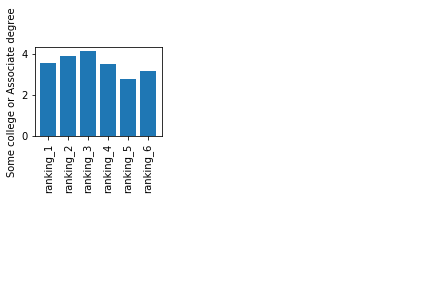

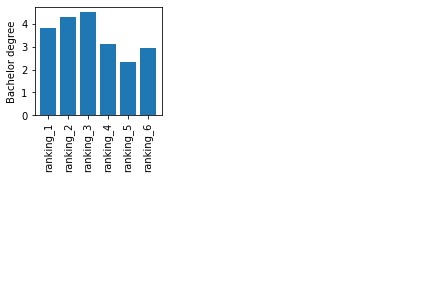

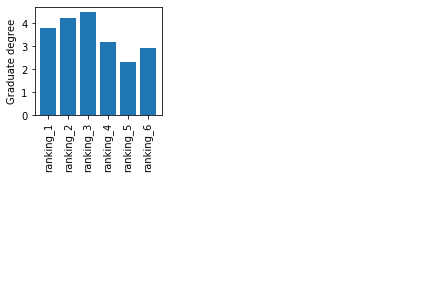

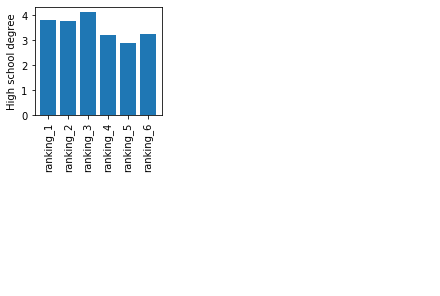

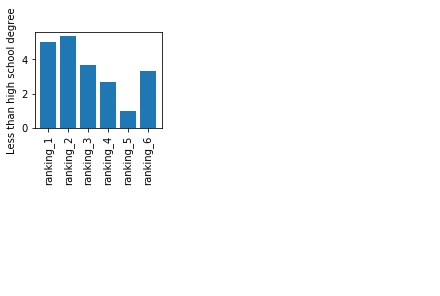

In [348]:
# Plotting ranking across education levels
x = range(6)

for level in education_levels:
    plot_number = 1
    plt.subplot(2,3,plot_number)
    plt.bar(x,education_vs_ranking_dict[level][0])
    plt.ylabel(level)
    plt.xticks(x,ranking_cols, rotation='vertical')
    plt.show()
    plot_number += 1    

#### Movie ranking across Education levels



Although movie 5 was ranked highest across all education levels, those with Less than high school degree ranked it higher than all other movies. Respondents who had AT LEAST a High School degree ranked movie 3 the worst, whereas those having Less than high school degree ranked movie 2 as worst. A similar pattern of ranking is seen across all education levels except for those with less than high school degree.

<font color='blue'>Aside from the 'Less than High School' education category, respondents' education does not seem to play a role in their star wars ranking.</font>

# Location (Census Region)
    Did respondent location impact their movie preference? movie attendance?

#### Comparing Location and movie attendance (seen)

In [369]:
  location_seen_df = star_wars[['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'Location (Census Region)']]

In [370]:
#Creating a pivot table to index Location with movies seen
location_seen_pivot = pd.pivot_table(location_seen_df, index = 'Location (Census Region)',aggfunc = 'sum')

In [371]:
location_seen_pivot

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
Location (Census Region),,,,,,
East North Central,102.0,89.0,89.0,95.0,128.0,121.0
East South Central,24.0,21.0,21.0,27.0,31.0,29.0
Middle Atlantic,79.0,69.0,70.0,76.0,83.0,85.0
Mountain,57.0,47.0,46.0,54.0,61.0,59.0
New England,50.0,44.0,43.0,48.0,55.0,54.0
Pacific,120.0,99.0,92.0,105.0,123.0,124.0
South Atlantic,104.0,82.0,79.0,93.0,125.0,120.0
West North Central,61.0,51.0,49.0,49.0,67.0,63.0
West South Central,62.0,58.0,50.0,49.0,70.0,69.0


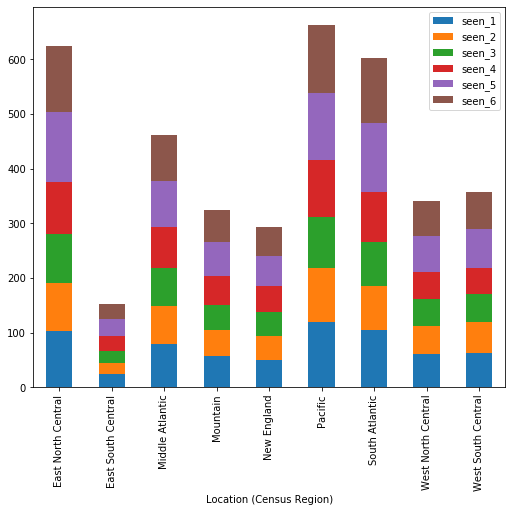

In [421]:
# Stacked bar plot of seen pivot table
location_seen_pivot.plot.bar(stacked = True, figsize = (7,7))

Respondents were mostly from Pacific and South Atlantic regions. Least amount of respondents were from East South Central. Across all regions, respondents seemed to have attended movies in equal percentages. 

#### Comparing Location and movie ranking

In [372]:
location_ranking_df = star_wars[['ranking_1', 'ranking_2','ranking_3', 'ranking_4', 'ranking_5', 'ranking_6', 'Location (Census Region)']]

In [399]:
#Creating a pivot table to index Location with movies rank
location_ranking_pivot = pd.pivot_table(location_ranking_df, index = 'Location (Census Region)',aggfunc = 'mean')

Text(0, 0.5, 'Average Rank')

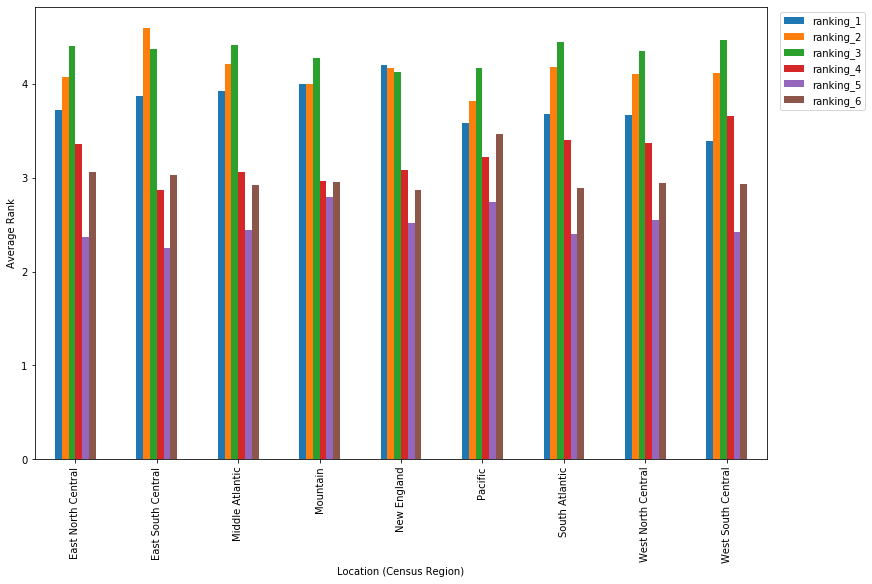

In [422]:
# Bar plot of ranking pivot table
%matplotlib inline
location_ranking_pivot.plot.bar(figsize = (12,8))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left') #Putting legend outide plot
plt.ylabel("Average Rank")

- Overall favorite movie - 'Episode V The Empire Strikes Back'
- Overall least favorite movie - Episode III Revenge of the Sith

Other observations:
    Respondents across all regions ranked movies 2 an 3 worst than first (slight exception is New England)
    They felt that movie 4 was significantly better than movie 3,and were less thrilled about movie 6 than 
    5.
    
**Movie ranking and attendance was generally the same across all regions.**

# Did ranking change if the respondents were star wars fans?

In [405]:
#Renaming column for star wars fan
star_wars_fan_map = {'Do you consider yourself to be a fan of the Star Wars film franchise?': 'fan of star wars'}
star_wars = star_wars.rename(columns = star_wars_fan_map )

In [407]:
#A look at the 'fan of star wars' column
star_wars['fan of star wars'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: fan of star wars, dtype: int64

Approx 29% of respondent did not say whether or not they are star wars fans

In [410]:
yes_no_star_wars_fans = star_wars[['fan of star wars','ranking_1', 'ranking_2','ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']]

In [411]:
yes_no_star_wars_fans.head()

,fan of star wars,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,True,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,1.0,2.0,3.0,4.0,5.0,6.0
4,True,5.0,6.0,1.0,2.0,4.0,3.0
5,True,5.0,4.0,6.0,2.0,1.0,3.0


In [412]:
#Pivot table indexing fan of stars
yes_no_fan_pivot = pd.pivot_table(yes_no_star_wars_fans, index = 'fan of star wars', aggfunc = 'mean')

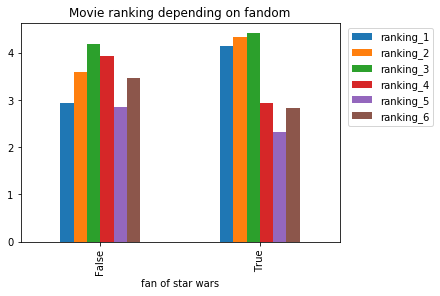

In [418]:
yes_no_fan_pivot.plot.bar(title = "Movie ranking depending on fandom")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left') #Putting legend outide plot

Fans or not fans of star wars ranked the movies similarly. The only difference is that star wars fans seemed to enjoy the first 3 movies more than non-fans (likely because they had a greater understanding of the background of the characters). Across both groups: Favorite: 'Episode V The Empire Strikes Back' & Least Favorite: 'Episode III  Revenge of the Sith'

# Conclusion:

- Favorite movie and most watched movie was clearly Episode V The Empire Strikes Back.
- Least favorite and least watched was 'Episode III Revenge of the Sith'.
- More males watch star wars than females, but movie preference depended on the specific movie. Prefences, though, were similar in range.
- Across geographic locations respondents have similar preferences and movie attendance numbers.
- Though fans had a greater appreciation of the first 3 movies, both fans and non fans rated sequels in 
  similar order.
    